In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ecological_footprint_data.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
data = data.drop("stab", axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()
data['stabf'] = encoder.fit_transform(data['stabf'])
data['stabf'] = data['stabf'].astype(float)

data['stabf'].unique()

array([1., 0.])

<AxesSubplot:>

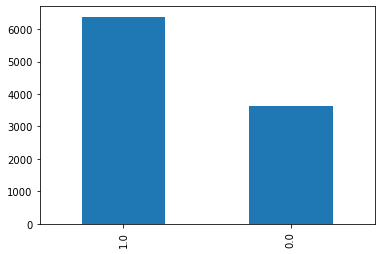

In [8]:
data['stabf'].value_counts().plot(kind='bar')

In [9]:
x = data.drop('stabf', axis=1)
y = data['stabf']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.83537431 -0.79131661  1.14170354 ...  1.22001311  1.32162751
   1.57902607]
 [ 1.47829663 -0.12670487 -0.80311147 ...  1.23035426  0.13542358
   0.93625569]
 [ 1.35709296  1.31213982 -0.80349871 ...  0.88129868  1.14659574
  -1.51380226]
 ...
 [-1.05234609 -0.87804866  1.28587062 ...  1.68284371 -1.37001303
  -1.38205402]
 [ 1.59768553 -0.45784646 -0.90902909 ...  0.2281105   1.32772953
   1.06982944]
 [ 0.4669346   0.55855544 -0.32829064 ... -0.0713212  -0.53325125
   1.52285961]]


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(random_state=1)
forest.fit(x_train, y_train)
y1_pred = forest.predict(x_test)

acc = accuracy_score(y_test, y1_pred)


In [13]:
import xgboost

xgb_train = xgboost.DMatrix(x_train, label=y_train)
xgb_test = xgboost.DMatrix(x_test)

In [14]:
num_rounds = 50
parameters = {'max_depth':7, 'objective':'binary:logistic', 'eval_metric':'auc'}

xgb_model = xgboost.train(parameters, xgb_train, num_rounds)
y_pred_xgb = xgb_model.predict(xgb_test)

In [15]:
for row in range(0,1999):
    if y_pred_xgb[row] >= 0.5:
        y_pred_xgb[row]=1
    else:
        y_pred_xgb[row]=0
        
acc_xgb = accuracy_score(y_test, y_pred_xgb)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extree = ExtraTreesClassifier(random_state=1)
extree.fit(x_train, y_train)
y2_pred = extree.predict(x_test)

acc_ext = accuracy_score(y_test, y2_pred)
acc_ext

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
'min_samples_leaf': min_samples_leaf,
'min_samples_split': min_samples_split,
'max_features': max_features}

In [ ]:
random = RandomizedSearchCV(estimator = extree, param_distributions=hyperparameter_grid, n_iter=100, cv=5, 
                            random_state=1, verbose=2, n_jobs=-1)
random.fit(x_train, y_train)

In [ ]:
print("Best parameters: ", random.best_params_, '\n')

In [ ]:
print(f'Accuracy of Random Forest: {acc} \n')
print(f'Accuracy of Extra Trees: {acc_ext} \n')
print(f'Accuracy of XGBoost: {acc_xgb}')